# Imports & other stuff

In [19]:
import regex
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Práctica 1
### 1.1. DataExtractor

In [20]:
from DataExtractor import DataExtractor

extractor = DataExtractor("Bitcoin_tweets_dataset_2.csv", chunksize=100000)

# Procesar los datos
df = extractor.process_text()

In [21]:
# Mostrar las primeras filas del DataFrame
df.head(40)

,user_name,text,Hashtags,URLs,Prices,Emoticons,Mentions
0,ChefSam,which #bitcoin books should i think about read...,[#bitcoin],[https://t.co/32gas26rkb],[],[],[]
1,Roy⚡️,@thankgodforbtc i appreciate the message but n...,[#bitcoin],[],[],[],[thankgodforbtc]
2,Ethereum Yoda,#ethereum price update: \n\n#eth $1664.02 usd\...,"[#ethereum, #eth, #bitcoin, #btc, #altcoin, #c...",[],[$1664.02],[],[]
3,Viction,coindashboard v3.0 is here\navailable on ios a...,[#bitcoin],[https://t.co/tmcqllv9rj],[],[],[]
4,Rosie,#bitcoin short term fractal 4h\n\nin lower tim...,"[#bitcoin, #btc]",[https://t.co/2mg9yl7sda],[],[],[]
5,AkinHack,yall message me for any account recovery or ha...,"[#cyber, #security, #coinbase, #bitcoin, #bnb,...",[],[],[],[]
6,CAIR (Pump/Dump),pump : 4-hour chart 1x normal\ncoin : #filu...,"[#filusdt, #fil, #bitcoin]",[https://t.co/zktyat6duh],[],[],[]
7,NFTevening,twelvefold by @yugalabs unveils unique #bitcoi...,"[#bitcoin, #nfts]",[https://t.co/uqsa1mkqij],[],[],[yugalabs]
8,AbdeL,@bitcoinbullsnft the first my #nft in #bitcoi...,"[#nft, #bitcoin]",[https://t.co/ho6t69frcz],[],[],[bitcoinbullsnft]
9,PUBLORD,your first #bitcoin halving will age and humbl...,[#bitcoin],[https://t.co/u6jwllnlmg],[],[],[]


In [22]:
df.to_csv('output.csv')

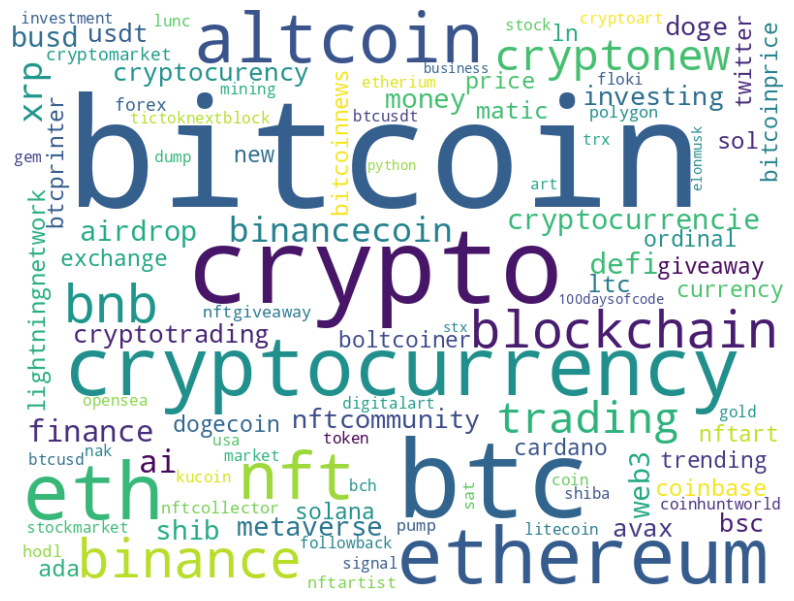

In [23]:
hashtags_series = df['Hashtags'].explode()
hashtags_text = ' '.join(hashtags_series.dropna().astype(str))

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    max_words=100,
    collocations=False
).generate(hashtags_text)

wordcloud.generate(hashtags_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
print(df["Prices"].head(10))  # Muestra los primeros 10 valores de la columna
print(df["Prices"].dtype)  # Muestra el tipo de dato de la columna


0            []
1            []
2    [$1664.02]
3            []
4            []
5            []
6            []
7            []
8            []
9            []
Name: Prices, dtype: object
object


In [26]:
print(df.info())  # Ver cantidad de valores nulos por columna
print(df.isnull().sum())  # Conteo de valores nulos en cada columna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169820 entries, 0 to 169819
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_name  169759 non-null  object
 1   text       169820 non-null  object
 2   Hashtags   169820 non-null  object
 3   URLs       169820 non-null  object
 4   Prices     169820 non-null  object
 5   Emoticons  169820 non-null  object
 6   Mentions   169820 non-null  object
dtypes: object(7)
memory usage: 9.1+ MB
None
user_name    61
text          0
Hashtags      0
URLs          0
Prices        0
Emoticons     0
Mentions      0
dtype: int64
